## Import Package

In [241]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

## Load Dataset

In [242]:
log_files_path_data = 'Data/'
dfmain = pd.read_csv(log_files_path_data + "Data_merged.csv",index_col=0)
dfmain.shape

(2079, 24)

In [243]:
dfmain["Close Price"].head()

0    1284.91
1    1261.52
2    1262.90
3    1252.31
4    1273.70
Name: Close Price, dtype: float64

In [244]:
Close = dfmain["Close Price"]
Open = dfmain["Open Price"]
Low = dfmain["Low Price"]
High = dfmain["High Price"]

In [245]:
# import all stock prices 
# ddf = pd.read_csv("SP500-2016.csv", index_col = 0)
# df.info()

In [246]:
# df1 = pd.read_csv("Y1layer13-9.csv",header=None)
# df1.shape

In [247]:
# df2 = pd.read_csv("Y3layer17-13-9.csv",header=None)
# df2.shape

In [248]:
# df3 = pd.read_csv("Y3layer18-14-10.csv",header=None)
# df3.shape

In [249]:
# df4 = pd.read_csv("Y5levelWT1layer13-9.csv",header=None)
# df4.shape

In [250]:
# df5 = pd.read_csv("Y5levelWT3layer17-13-9.csv",header=None)
# df5.shape


In [251]:
df6 = pd.read_csv(log_files_path_data + "Y5levelWT3layer18-14-10.csv",header=None)
df6.shape

(2079, 10)

In [252]:
df6[10] = Close
df6[11] = Open
df6[12] = Low
df6[13] = High

In [253]:
## DataFrame "Y1layer13-9.csv" with Close 
df6.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.504333,0.020622,0.091492,0.994347,0.062468,0.753422,0.052363,0.081885,0.827858,0.050652,1284.91,1276.69,1260.68,1285.31
1,0.501698,0.026658,0.115132,0.990695,0.081316,0.703286,0.069166,0.108327,0.810352,0.061496,1261.52,1285.82,1261.51,1292.17
2,0.485075,0.060177,0.152833,0.973803,0.133416,0.658505,0.111763,0.168914,0.781748,0.100574,1262.90,1262.96,1252.01,1271.48
3,0.464489,0.116995,0.182066,0.944323,0.187973,0.661275,0.156666,0.228894,0.752713,0.158890,1252.31,1262.90,1240.68,1273.95
4,0.442971,0.214841,0.237523,0.874115,0.255235,0.647284,0.220174,0.314977,0.713180,0.250511,1273.70,1251.84,1242.84,1274.17


In [254]:
df6.shape

(2079, 14)

## Modify Dataset here--- Last column is "Close"

In [255]:
df = df6.copy() # Copy from the input dataset


In [256]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [257]:
# number of different stocks: here is only one index of S&P 500
#print('\nnumber of different stocks: ', len(list(set(df.symbol))))
#print(list(set(df.symbol))[:10])
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2074,0.052820,0.989874,0.999818,0.000755,0.971578,0.474959,0.999487,0.998146,0.002750,0.927974,2146.10,2158.54,2145.04,2158.54
2075,0.151073,0.966141,0.998049,0.005539,0.972198,0.501106,0.998768,0.994376,0.011879,0.883173,2159.93,2146.04,2141.55,2161.13
2076,0.172801,0.945798,0.995873,0.009931,0.986773,0.531893,0.996959,0.994175,0.019080,0.881205,2171.37,2161.85,2151.79,2172.40
2077,0.248866,0.895797,0.984585,0.024850,0.977304,0.540552,0.993021,0.986591,0.044517,0.850514,2151.13,2168.90,2145.20,2172.67
2078,0.269670,0.677560,0.999847,0.002922,0.997865,0.426223,0.995758,0.999581,0.009800,0.970643,2168.27,2156.51,2156.51,2175.30


In [258]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03,2.079000e+03,2079.000000,2079.000000,2079.000000,2079.000000
mean,0.448633,0.476277,0.458049,0.536627,0.479204,0.563948,0.463660,0.501352,5.359262e-01,5.311102e-01,1510.099153,1509.691318,1499.889067,1518.775926
std,0.356879,0.427840,0.454359,0.424406,0.411453,0.180330,0.449585,0.423455,4.268692e-01,3.498242e-01,414.400699,414.273657,414.867564,413.677503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.018820,0.000000,0.000000,1.440392e-08,1.381651e-13,676.530000,679.280000,666.790000,695.270000
25%,0.104377,0.011432,0.001587,0.028218,0.032800,0.451564,0.004448,0.027546,2.083620e-02,2.010603e-01,1173.705000,1173.535000,1163.575000,1184.545000
50%,0.383275,0.388727,0.237523,0.644120,0.418546,0.580291,0.299352,0.453056,6.756100e-01,5.646396e-01,1402.890000,1402.580000,1396.560000,1407.750000
75%,0.805877,0.981591,0.998872,0.986468,0.967137,0.683531,0.993332,0.988503,9.781794e-01,8.693684e-01,1940.895000,1941.440000,1927.625000,1951.110000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.999369,1.000000,1.000000,1.000000e+00,1.000000e+00,2190.150000,2187.810000,2186.800000,2193.810000


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 14 columns):
0     2079 non-null float64
1     2079 non-null float64
2     2079 non-null float64
3     2079 non-null float64
4     2079 non-null float64
5     2079 non-null float64
6     2079 non-null float64
7     2079 non-null float64
8     2079 non-null float64
9     2079 non-null float64
10    2079 non-null float64
11    2079 non-null float64
12    2079 non-null float64
13    2079 non-null float64
dtypes: float64(14)
memory usage: 227.5 KB


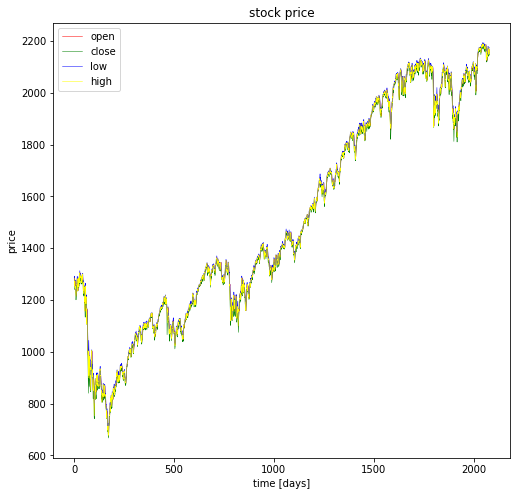

In [260]:
## This observation is only for raw_dataset, not from autoencoder result
## 'Close Price', 'Open Price','High Price','Low Price',
plt.figure(figsize=(18, 8));
plt.subplot(1,2,1);
plt.plot(dfmain['Open Price'], color='red', label='open',linewidth=0.5)
plt.plot(dfmain['Low Price'], color='green', label='close',linewidth=0.5)
plt.plot(dfmain['High Price'], color='blue', label='low',linewidth=0.5)
plt.plot(dfmain['Close Price'], color='yellow', label='high',linewidth=0.5)
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

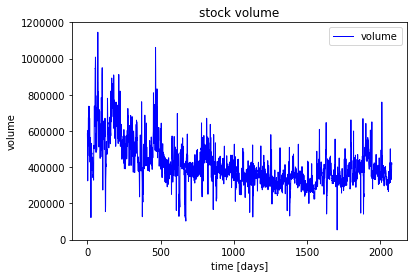

In [261]:
# plt.subplot(1,2,2);
plt.plot(dfmain["Volume"], color='b', label='volume',linewidth=1)
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');
plt.show()

## 3. Manipulate data <a class="anchor" id="3-bullet"></a> 

In [262]:
## Spring 2019
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    scaler = [None] * df.shape[1]
    for i in range(df.shape[1]):
        scaler[i] = min_max_scaler.fit(df[i].values.reshape(-1,1))
        df[i] = scaler[i].transform(df[i].values.reshape(-1,1))  
    return scaler, df

In [263]:
# - choose a specific stock
# - drop feature: volume
# - normalize stock data
# - create train, validation and test data sets

# function for min-max normalization of stock
# def normalize_data(df):
#     min_max_scaler = sklearn.preprocessing.MinMaxScaler()
#     df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
#     df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
#     df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
#     df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
#     return df

In [264]:
len(df)

2079

In [265]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    print(len(data[0][0])) ## (len-20)*seq_len* features(include close)
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [266]:
 [x_train, y_train, x_valid, y_valid, x_test, y_test] = load_data(df, 20)

14


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [267]:
# choose one stock
df_stock = df.copy()
#df_stock.drop(['symbol'],1,inplace=True)
# df_stock.drop(['Volume'],1,inplace=True)
# df_stock.drop(['Adj Close'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
min_max_scaler, df_stock_norm = normalize_data(df_stock_norm)
# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
14
x_train.shape =  (1647, 19, 14)
y_train.shape =  (1647, 14)
x_valid.shape =  (206, 19, 14)
y_valid.shape =  (206, 14)
x_test.shape =  (206, 19, 14)
y_test.shape =  (206, 14)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [268]:
# plt.figure(figsize=(15, 5));
# plt.plot(df_stock_norm.Open.values, color='red', label='open')
# plt.plot(df_stock_norm.Close.values, color='green', label='low')
# plt.plot(df_stock_norm.Low.values, color='blue', label='low')
# plt.plot(df_stock_norm.High.values, color='black', label='high')
# #plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
# plt.title('stock')
# plt.xlabel('time [days]')
# plt.ylabel('normalized price/volume')
# plt.legend(loc='best')
# plt.show()

## 4. Model and validate data <a class="anchor" id="4-bullet"></a>

In [269]:
 # - RNNs with basic, LSTM, GRU cells
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)

[   0    1    2 ... 1644 1645 1646]


In [270]:
# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size       
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [271]:
# parameters
index_to_begin = 10
index_to_stop = 13

n_steps = seq_len-1 
n_inputs = 14
n_neurons = 512 # number of units is 200
n_outputs = 14 #Was 11, should be 1 as we are only interested in close prices
n_layers = 5  # layers should be 5
learning_rate = 0.0005
batch_size = 50 # batch size should be 60
n_epochs = 200  # should be 5000
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)[index_to_begin:index_to_stop]) 
# loss function = mean squared error 
#I made loss function only dependend on the indexes that we are interested in, instead of all variables

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%d epochs: MSE train/valid = %.6f/%.6f'%(
                int(iteration*batch_size/train_set_size), mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0 epochs: MSE train/valid = 0.162947/0.399439
4 epochs: MSE train/valid = 0.048047/0.118333
9 epochs: MSE train/valid = 0.040202/0.165512
14 epochs: MSE train/valid = 0.047174/0.063522
19 epochs: MSE train/valid = 0.035416/0.003703
24 epochs: MSE train/valid = 0.043796/0.020393
29 epochs: MSE train/valid = 0.034300/0.010198
34 epochs: MSE train/valid = 0.043337/0.009729
39 epochs: MSE train/valid = 0.036393/0.013736
44 epochs: MSE train/valid = 0.031927/0.013474
49 epochs: MSE train/valid = 0.043672/0.014138
54 epochs: MSE train/valid = 0.035066/0.016619
59 epochs: MSE train/valid = 0.034836/0.003348
64 epochs: MSE train/valid = 0.040195/0.009487
69 epochs: MSE train/valid = 0.027106/0.015770
74 epochs: MSE train/valid = 0.027650/0.016420
79 epochs: MSE train/valid = 0.030959/0.005631
84 epochs: MSE train/valid = 0.023318/0.011986
89 epochs: MSE train/valid = 0.034130/0.012072
94 epochs: MSE train/valid = 0.021283/0.013072
99 epochs: MSE train/valid = 0.027061/0.003247
104 epochs: MSE 

In [272]:
# # 5. Predictions <a class="anchor" id="5-bullet"></a> 

#De-normalize the values
for i in range(y_train.shape[1]):
    y_train[:,i] = min_max_scaler[i].inverse_transform(y_train[:,i].reshape(1,-1))
    y_train_pred[:,i] = min_max_scaler[i].inverse_transform(y_train_pred[:,i].reshape(1,-1))
    y_valid[:,i] = min_max_scaler[i].inverse_transform(y_valid[:,i].reshape(1,-1))
    y_valid_pred[:,i] = min_max_scaler[i].inverse_transform(y_valid_pred[:,i].reshape(1,-1))
    y_test[:,i] = min_max_scaler[i].inverse_transform(y_test[:,i].reshape(1,-1))
    y_test_pred[:,i] = min_max_scaler[i].inverse_transform(y_test_pred[:,i].reshape(1,-1))

correct sign prediction for close - (close-1) price for train/valid/test: 0.55/0.44/0.49


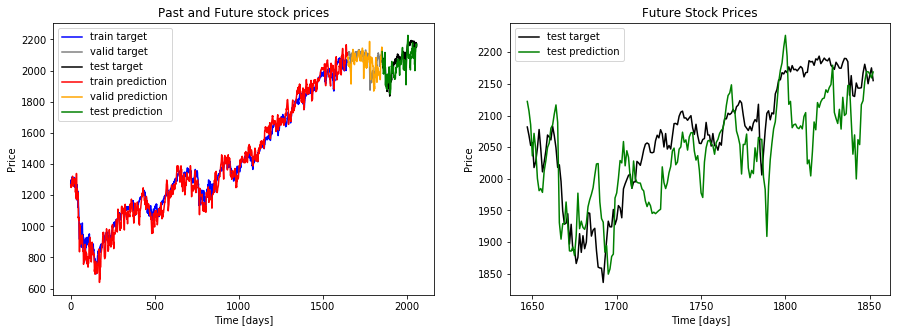

In [273]:
ft = 10  # 10=close, 11=open, 12=high, 13=low
## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Past and Future stock prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Future Stock Prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');


#adjust the columns of the variables in order to get the right accuracy prediction. 
sign_correct_train = np.sum(np.equal(np.sign(y_train[1:,ft]-y_train[:len(y_train)-1,ft]),
            np.sign(y_train_pred[1:,ft]-y_train_pred[:len(y_train_pred)-1,ft])).astype(int))
corr_price_development_train = sign_correct_train / y_train.shape[0]

sign_correct_valid = np.sum(np.equal(np.sign(y_valid[1:,ft]-y_valid[:len(y_valid)-1,ft]),
            np.sign(y_valid_pred[1:,ft]-y_valid_pred[:len(y_valid_pred)-1,ft])).astype(int))
corr_price_development_valid = sign_correct_valid / y_valid.shape[0]

sign_correct_test = np.sum(np.equal(np.sign(y_test[1:,ft]-y_test[:len(y_test)-1,ft]),
            np.sign(y_test_pred[1:,ft]-y_test_pred[:len(y_test_pred)-1,ft])).astype(int))
corr_price_development_test = sign_correct_test / y_test.shape[0]

print('correct sign prediction for close - (close-1) price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()

In [274]:
#Test the significance level of our correct sign prediction
significance_train = scipy.stats.binom_test(sign_correct_train, n=y_train.shape[0], p=0.50)
significance_valid = scipy.stats.binom_test(sign_correct_valid, n=y_valid.shape[0], p=0.50)
significance_test = scipy.stats.binom_test(sign_correct_test, n=y_test.shape[0], p=0.50)
print(significance_train)
print(significance_valid)
print(significance_test)

7.965873626749997e-05
0.10882355441863456
0.8344962831599011


In [282]:
#Calculate MAPE
mape_train = np.mean(abs(np.divide(y_train_pred,y_train)))
mape_valid = np.mean(abs(np.divide(y_valid_pred, y_valid)))
mape_test = np.mean(abs(np.divide(y_test_pred, y_test)))
print('MAPE for train/validation/test set : %.2f/%.2f/%.2f'%(mape_train, mape_valid, mape_test))

MAPE for train/validation/test set : 1.01/1.03/1.04


In [278]:
#Store the actual values and predictions in a dataframe and export
log_files_path_export = 'Data/Output/'
export_pred = np.concatenate([y_train_pred[:,ft], y_valid_pred[:,ft], y_test_pred[:,ft]])
export_pred_df = pd.DataFrame(export_pred)
export_pred_df.to_csv(log_files_path_export + 'LSTModel_outputY5levelWT3layer18-14-10.csv')


export_actual =  np.concatenate([y_train[:,ft], y_valid[:,ft], y_test[:,ft]])
export_actual_df = pd.DataFrame(export_actual)
export_actual_df.to_csv(log_files_path_export + 'actualY5levelWT3layer18-14-10.csv')

To do:
- De-normalize the final output of the LSTM!!!! -> Done

- adjust for open, high, low (should be easy to do) -> Done
- Adjust strategies/plots for open, high, low
- Look at why 11 outputs
- Inspect convergence of LSTM ->Learning rate of 0.0005 seems okay, starts cycling after 150 iterations
- Make 1-layer data LSTMs work -> Mistake was in autoencoder header, is fixed, but needs to be rerun.
- Change BLSTM
- Change GRU
- Run LSTMs on raw data
- Other criteria for model fit -> Include MAPE
- Include NLP-data
- Optimize bounds of strategies

In [277]:
log_files_path_export = 'Data/Output/'
export_pred = np.concatenate([y_train_pred, y_valid_pred, y_test_pred])
export_pred_df = pd.DataFrame(export_pred)
export_pred_df.to_csv(log_files_path_export + 'allOutputsLSTModel_outputY5levelWT3layer18-14-10.csv')


export_actual =  np.concatenate([y_train, y_valid, y_test])
export_actual_df = pd.DataFrame(export_actual)
export_actual_df.to_csv(log_files_path_export + 'allOutputsActualY5levelWT3layer18-14-10.csv')